In [2]:
# 导入必要包和比较函数
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from metrics.visualization_metrics import PCA_Analysis, tSNE_Analysis
from utils.recurrence import intertemporal_recurrence_matrix, de_irp

C:\Users\14425\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# 真实数据处理：真实数据->rp值->逆rp化，保存为两个结果：rp矩阵和序列
data_t = pd.read_csv('./data/GOOG_BIG.csv')
data_t = data_t.filter(['Open'], axis=1)
data_t.rename(columns={'Open':'Value'}, inplace=True)
value_t = data_t.Value
time_window = 28
data_t = np.asarray([value_t[i:i + time_window] for i in range(len(data_t) - time_window)], dtype=np.float32) #窗格化完成

# rp化
length = data_t.shape[0]
rp_t = torch.empty(length, 1, time_window, time_window)
for i in range(length):
    matrix = torch.from_numpy(intertemporal_recurrence_matrix(data_t[i]))
    rp_t[i] = matrix.view((1, time_window, time_window))

# 逆rp化
X_t = np.zeros((rp_t.shape[0], 28))
for i in range(rp_t.shape[0]):
    item = rp_t[i][0][0]
    item = de_irp(item, 100)
    X_t[i] = item
# data_t:nparray(3657, 28), X_t:nparray(3657, 28), rp_t:torchTensor([3657, 1, 28, 28])

In [4]:
# 生成数据处理：生成数据->rp值，保存为两个结果：rp矩阵和序列
data_s = pd.read_csv('./oldmodel2000samples.csv')
data_s = np.asarray(data_s, dtype=np.float32)
X_s = data_s

#rp化
length = data_s.shape[0]
rp_s = torch.empty(length, 1, time_window, time_window)
for i in range(length):
    matrix = torch.from_numpy(intertemporal_recurrence_matrix(data_s[i]))
    rp_s[i] = matrix.view((1, time_window, time_window))
    
# data_s:nparray(199, 28), X_s:nparray(199, 28), rp_s:torchTensor([199, 1, 28, 28])

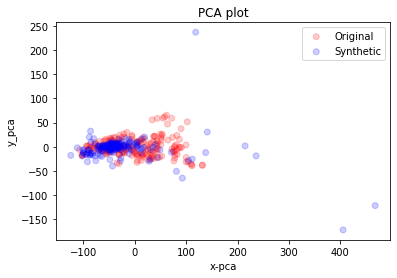

C:\Users\14425\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\14425\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 398 samples in 0.000s...
[t-SNE] Computed neighbors for 398 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 398 / 398
[t-SNE] Mean sigma: 13.052078
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.565334
[t-SNE] KL divergence after 300 iterations: 0.476713


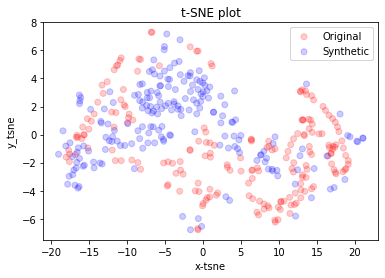

In [5]:
# 序列比较, 目标输入格式list（length， array（time_window, batch_size））
# 数据形状转换
dataX = []
for i in range(X_t.shape[0]):
    temp = np.zeros((time_window, 1))
    for j in range(time_window):
        temp[j] = np.asarray(X_t[i][j])
    dataX.append(temp)
dataX_hat = []
for i in range(X_s.shape[0]):
    temp = np.zeros((time_window, 1))
    for j in range(time_window):
        temp[j] = np.asarray(X_s[i][j])
    dataX_hat.append(temp)
    
PCA_Analysis(dataX, dataX_hat)
tSNE_Analysis(dataX, dataX_hat)

In [1]:
# 其他分数比较
from metrics.predictive_score_metrics_v2 import predictive_score_metrics
from metrics.discriminative_score_metrics_v2 import discriminative_score_metrics
from metrics.numerical_metrics import evaluate_all

In [6]:
predictive_score_metrics(dataX, dataX_hat)

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use tf.global_variables instead.


KeyboardInterrupt: 

In [17]:
# rp矩阵比较

In [22]:
data_s.shape

(199, 28)

array([[100.        ],
       [101.01000214],
       [110.74999237],
       [111.24000549],
       [104.95999908],
       [104.94999695],
       [108.1000061 ],
       [105.27999115],
       [102.30000305],
       [102.70000458],
       [ 99.19001007],
       [100.95000458],
       [101.01000214],
       [100.74000549],
       [102.52999115],
       [101.6000061 ],
       [106.63000488],
       [107.45001221],
       [110.55999756],
       [112.3400116 ],
       [114.41999817],
       [116.94999695],
       [119.80999756],
       [117.40000153],
       [118.83998871],
       [120.94000244],
       [119.56000519],
       [121.30000305]])